<a href="https://colab.research.google.com/github/tanisaur/forumla1-mini-sprint/blob/searcy/pit_stops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tanisaur/forumla1-mini-sprint.git


Cloning into 'forumla1-mini-sprint'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 136 (delta 32), reused 3 (delta 3), pack-reused 86
Receiving objects: 100% (136/136), 7.55 MiB | 10.13 MiB/s, done.
Resolving deltas: 100% (62/62), done.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
pit_stops = pd.read_csv('/content/forumla1-mini-sprint/data/pit_stops.csv')
print(f"EDA for pit stops\n")
pit_stops

EDA for pit stops



,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798
10085,1110,830,2,30,16:00:16,23.012,23012
10086,1110,848,3,33,16:07:06,23.529,23529
10087,1110,858,3,34,16:09:09,23.109,23109


In [8]:
# @title
# Display basic information
print("Basic Information:\n")
pit_stops.info()

# Display the number of unique values in each column
print("\nUnique Values:\n")
print(pit_stops.nunique())

print("\n")


Basic Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089 entries, 0 to 10088
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        10089 non-null  int64 
 1   driverId      10089 non-null  int64 
 2   stop          10089 non-null  int64 
 3   lap           10089 non-null  int64 
 4   time          10089 non-null  object
 5   duration      10089 non-null  object
 6   milliseconds  10089 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 551.9+ KB

Unique Values:

raceId           251
driverId          72
stop               6
lap               74
time            7492
duration        6969
milliseconds    6969
dtype: int64




In [17]:
pit_stops.isnull().sum()

raceId          0
driverId        0
stop            0
lap             0
time            0
duration        0
milliseconds    0
dtype: int64

Driver with the lowest pit stop time: Pastor	Maldonado

In [9]:
min_pit_stop = pit_stops.loc[pit_stops['milliseconds'].idxmin()]

driver_with_min_pit_stop = min_pit_stop['driverId']
min_pit_stop_time = min_pit_stop['milliseconds']

print(f"Driver with the lowest pit stop time: {driver_with_min_pit_stop}")
print(f"Lowest pit stop time (in milliseconds): {min_pit_stop_time}")


Driver with the lowest pit stop time: 813
Lowest pit stop time (in milliseconds): 12897


In [10]:
max_pit_stop = pit_stops.loc[pit_stops['milliseconds'].idxmax()]

driver_with_max_pit_stop = max_pit_stop['driverId']
max_pit_stop_time = max_pit_stop['milliseconds']

print(f"Driver with the highest pit stop time: {driver_with_max_pit_stop}")
print(f"Highest pit stop time (in milliseconds): {max_pit_stop_time}")

Driver with the highest pit stop time: 840
Highest pit stop time (in milliseconds): 3069017


In [12]:
median_pit_stop_time = pit_stops['milliseconds'].median()

print(f"Median pit stop time (in milliseconds): {median_pit_stop_time}")

Median pit stop time (in milliseconds): 23570.0


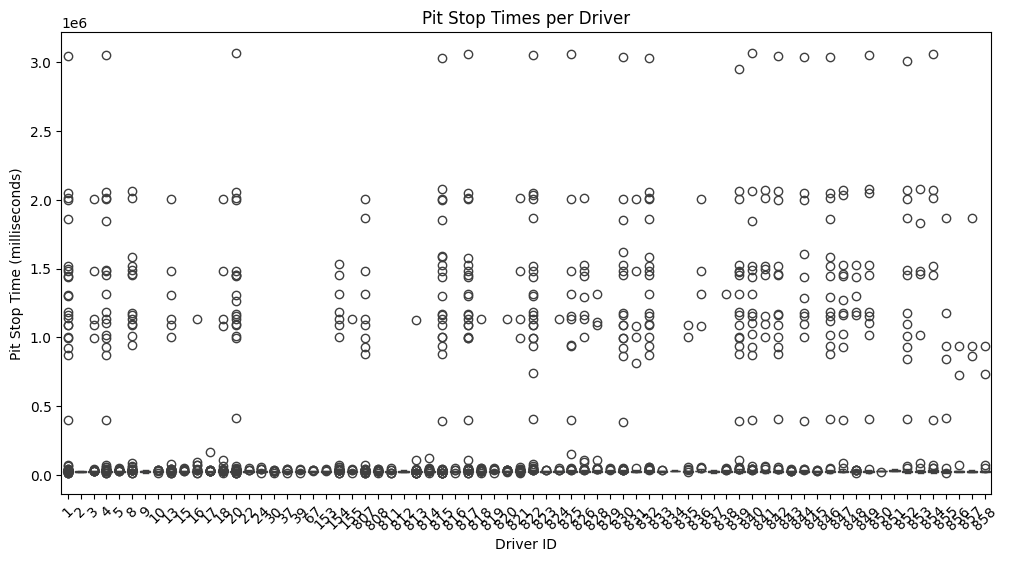

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='driverId', y='milliseconds', data=pit_stops)
plt.xlabel('Driver ID')
plt.ylabel('Pit Stop Time (milliseconds)')
plt.title('Pit Stop Times per Driver')
plt.xticks(rotation=45)
plt.show()



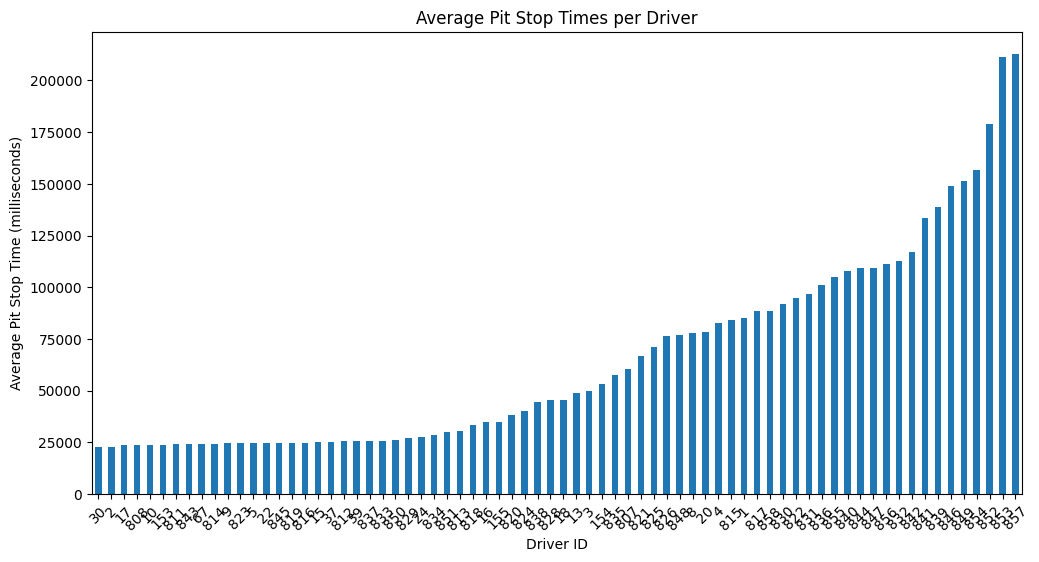

In [14]:
# Average pit stop time per driver
avg_pit_stops = pit_stops.groupby('driverId')['milliseconds'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_pit_stops.plot.bar()
plt.xlabel('Driver ID')
plt.ylabel('Average Pit Stop Time (milliseconds)')
plt.title('Average Pit Stop Times per driver')
plt.xticks(rotation=45)
plt.show()

In [15]:
best_driver_id = avg_pit_stops.index[0]

print(f"Driver with the best average pit stop time: {best_driver_id}")

Driver with the best average pit stop time: 30


In [16]:
worst_driver_id = avg_pit_stops.index[-1]

print(f"Driver with the worst average pit stop time: {worst_driver_id}")

Driver with the worst average pit stop time: 857


In [18]:
sprint_results = pd.read_csv('/content/forumla1-mini-sprint/data/sprint_results.csv')
print(f"EDA for sprint_results\n")
sprint_results

EDA for sprint_results



,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16,16,16,0,11,+37.571,1536004,6,2:03.482,1
176,177,1110,807,210,27,20,17,17,17,0,11,+37.827,1536260,6,2:03.472,1
177,178,1110,852,213,22,16,18,18,18,0,11,+39.267,1537700,7,2:02.080,1
178,179,1110,815,9,11,8,\N,R,19,0,8,\N,\N,2,2:02.516,130


In [21]:
merged_data = pd.merge(pit_stops, sprint_results[['raceId', 'driverId', 'constructorId']], on=['raceId', 'driverId'])

# average pit stop time for each constructor
avg_pit_stop_times = merged_data.groupby('constructorId')['milliseconds'].mean().reset_index()
avg_pit_stop_times = avg_pit_stop_times.sort_values(by='milliseconds')

#best and worst constructors
best_constructor = avg_pit_stop_times.iloc[0]
worst_constructor = avg_pit_stop_times.iloc[-1]

print("Best Constructor:")
print(best_constructor)

print("\nWorst Constructor:")
print(worst_constructor)

Best Constructor:
constructorId        9.000000
milliseconds     73648.097561
Name: 3, dtype: float64

Worst Constructor:
constructorId       214.0
milliseconds     139927.2
Name: 9, dtype: float64


<ipython-input-22-c0ceeeae4bc2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='constructorId', y='milliseconds', data=avg_pit_stop_times, palette='viridis')


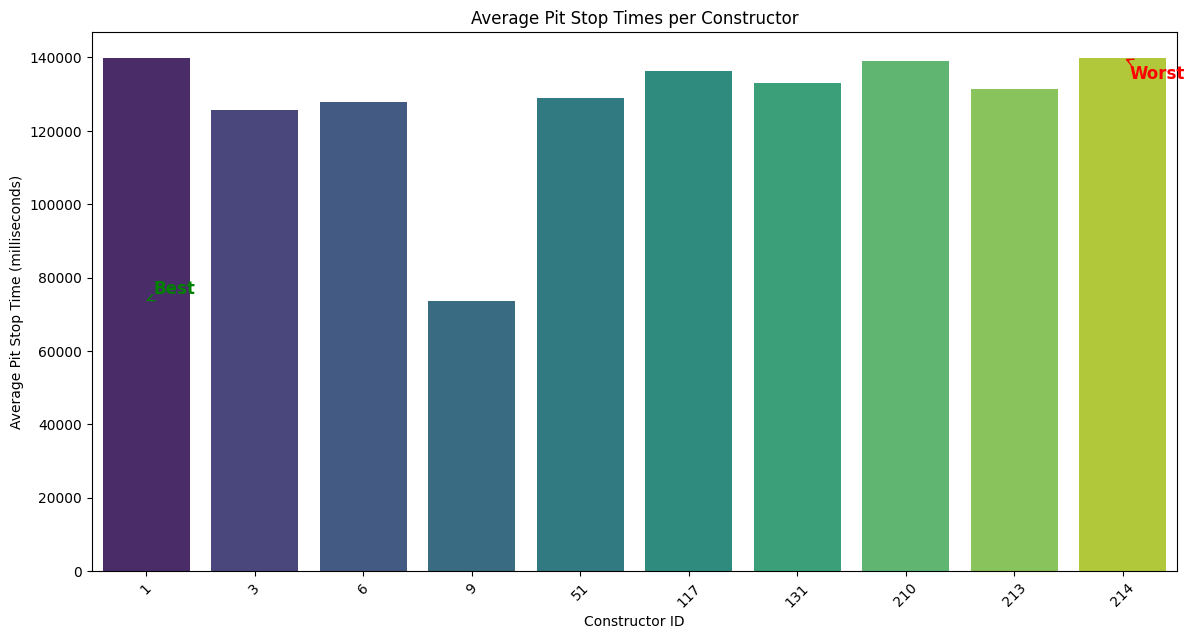

In [22]:
plt.figure(figsize=(14, 7))
sns.barplot(x='constructorId', y='milliseconds', data=avg_pit_stop_times, palette='viridis')

plt.annotate('Best',
             xy=(avg_pit_stop_times['constructorId'].tolist().index(best_constructor['constructorId']), best_constructor['milliseconds']),
             xytext=(5, 5),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='green'),
             color='green',
             fontsize=12,
             fontweight='bold')

plt.annotate('Worst',
             xy=(avg_pit_stop_times['constructorId'].tolist().index(worst_constructor['constructorId']), worst_constructor['milliseconds']),
             xytext=(5, -15),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'),
             color='red',
             fontsize=12,
             fontweight='bold')

plt.xlabel('Constructor ID')
plt.ylabel('Average Pit Stop Time (milliseconds)')
plt.title('Average Pit Stop Times per Constructor')
plt.xticks(rotation=45)
plt.show()